# Import

In [7]:
%matplotlib inline
import glob
import re
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# Load parameters

In [19]:
model_path = 'results/results-gridsearch-02/model'
param_files = sorted(glob.glob(model_path + '/*/'))
params = []
for file_name in param_files:
    epoch_file_name = file_name + "epochs.csv"
    param_file_name = file_name + "params.txt"
    file = open(param_file_name, 'r')
    param = file.read()
    param = re.sub('\)', '', param)
    param = re.sub('decay=', 'decay: ', param)
    param = re.sub(',.*?: ', '|', param)
    param = re.sub('optimizer: ', '', param)
    param = re.sub('\(lr=', '|', param)
    param = re.sub('\)\|', '|', param)
    param = param.split("|")
    param.append(file_name.replace(model_path + '\\', ''))
    param.append(pd.read_csv(epoch_file_name))
    params.append(param)
    file.close()

# Display some data

In [20]:
params[0][8].head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.520,0.699284,0.581731,0.691505
1,1,0.527,0.691435,0.572115,0.690799
2,2,0.565,0.692394,0.567308,0.690336
3,3,0.538,0.695277,0.567308,0.689688
4,4,0.544,0.691813,0.562500,0.689167


# Plot epochs for each item in params

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,1,Adam,0.0001,0,4,8,16,0,2018-03-01-03-42-20\


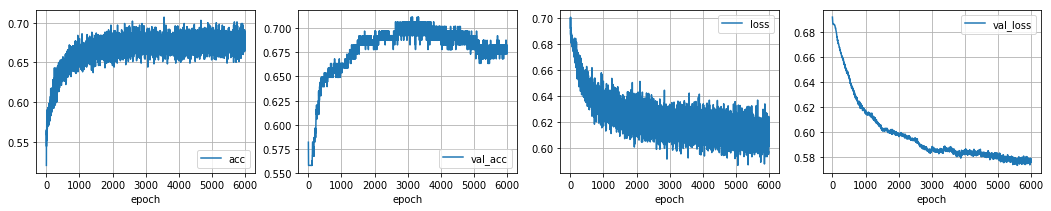

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,2,Adam,0.0001,0.00001,4,8,16,0,2018-03-01-04-05-30\


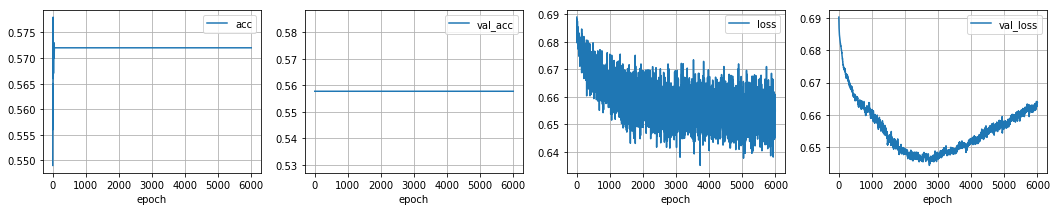

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,3,Adam,0.0001,0.000001,4,8,16,0,2018-03-01-04-29-39\


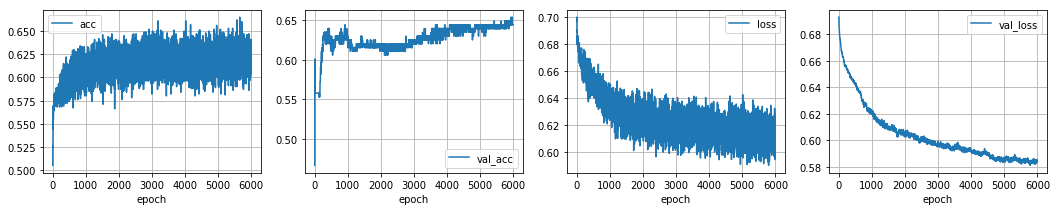

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,4,Adam,0.00001,0.000001,4,8,16,0,2018-03-01-04-54-47\


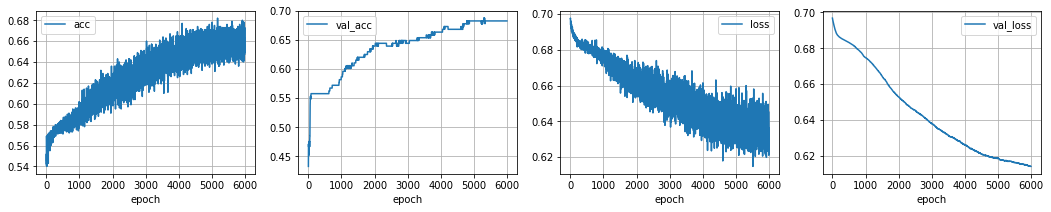

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,5,RMSprop,0.0001,0,4,8,16,0,2018-03-01-05-20-27\


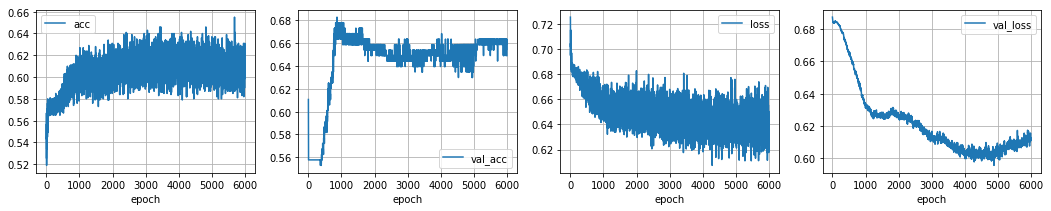

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,6,RMSprop,0.0001,0.00001,4,8,16,0,2018-03-01-05-45-27\


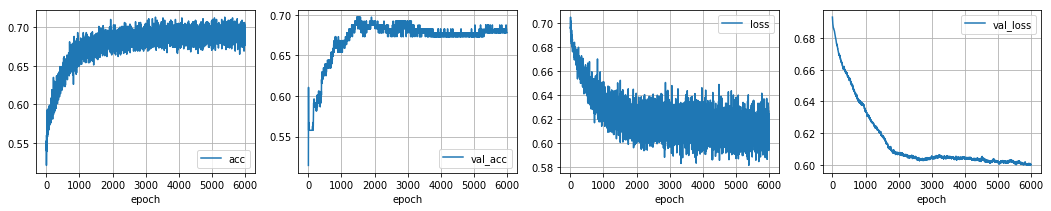

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,7,RMSprop,0.0001,0.000001,4,8,16,0,2018-03-01-06-09-18\


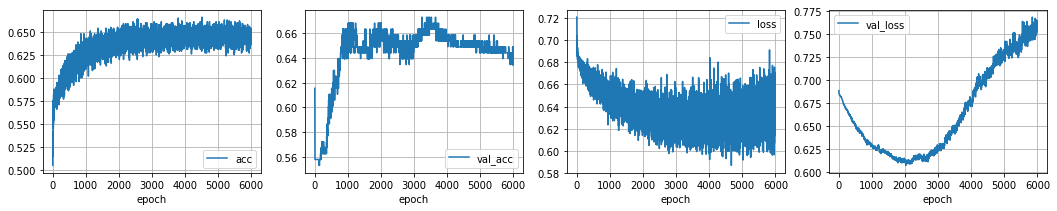

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,8,RMSprop,0.00001,0.000001,4,8,16,0,2018-03-01-06-33-20\


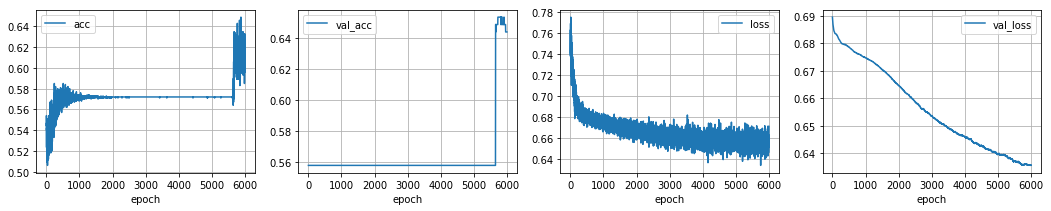

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,9,Adam,0.0001,0,4,32,16,0,2018-03-01-06-55-21\


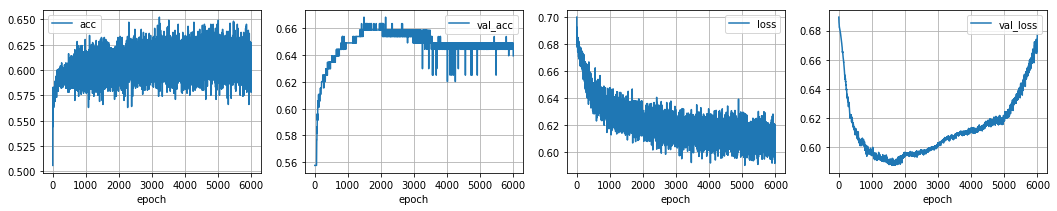

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,10,Adam,0.0001,0.00001,4,32,16,0,2018-03-01-07-19-56\


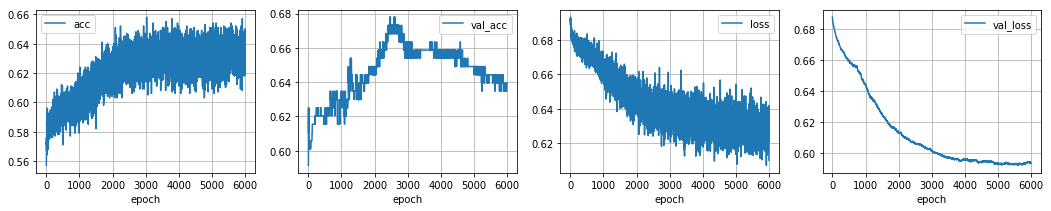

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,11,Adam,0.0001,0.000001,4,32,16,0,2018-03-01-07-44-24\


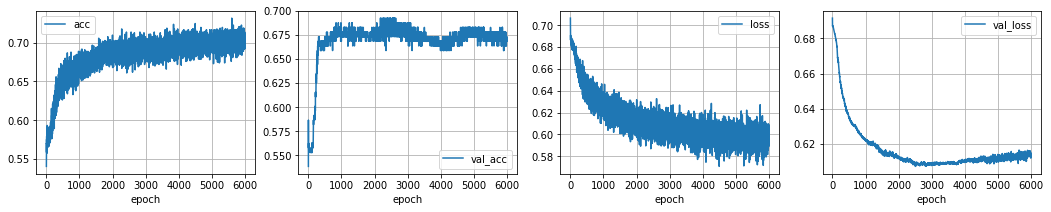

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,12,Adam,0.00001,0.000001,4,32,16,0,2018-03-01-08-08-50\


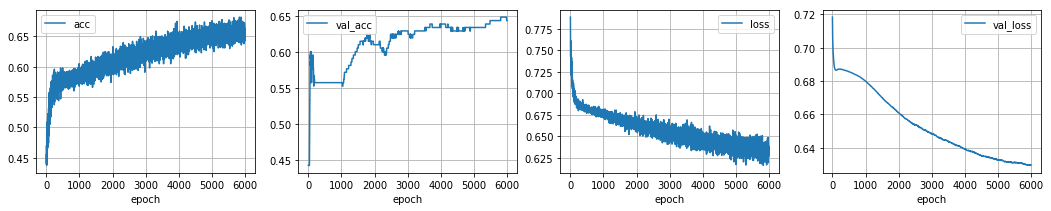

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,13,RMSprop,0.0001,0,4,32,16,0,2018-03-01-08-33-28\


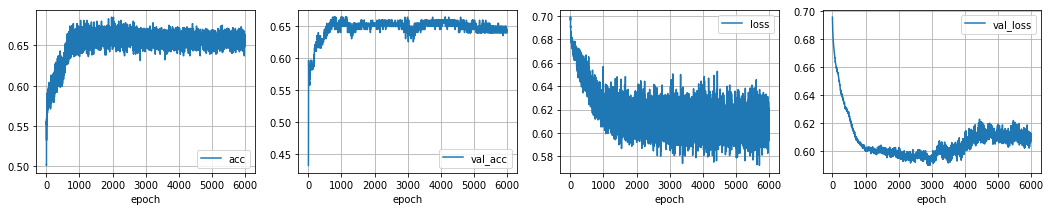

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,14,RMSprop,0.0001,0.00001,4,32,16,0,2018-03-01-08-56-57\


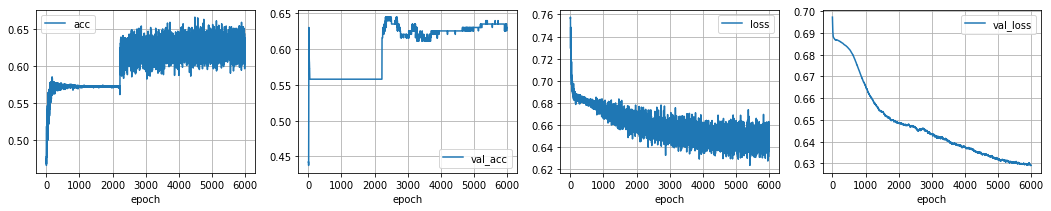

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,15,RMSprop,0.0001,0.000001,4,32,16,0,2018-03-01-09-20-34\


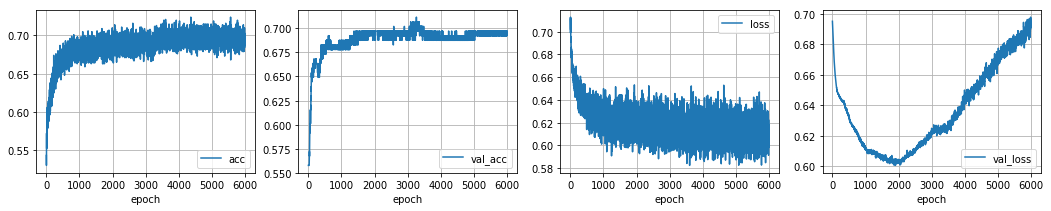

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,16,RMSprop,0.00001,0.000001,4,32,16,0,2018-03-01-09-44-28\


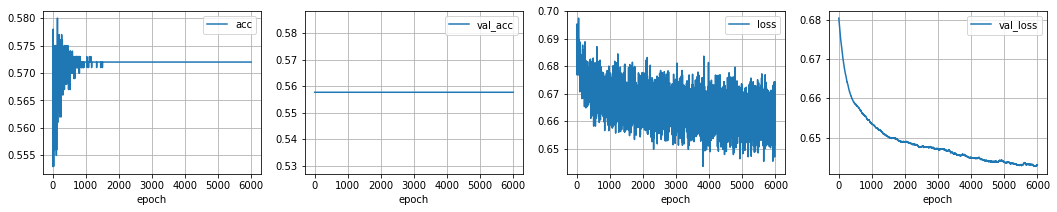

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,17,Adam,0.0001,0,4,64,8,0,2018-03-01-10-07-42\


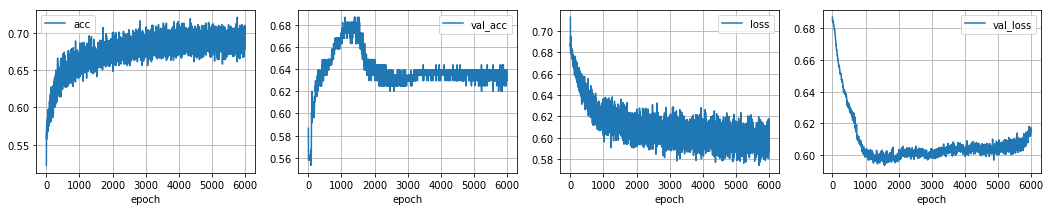

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,18,Adam,0.0001,0.00001,4,64,8,0,2018-03-01-10-32-42\


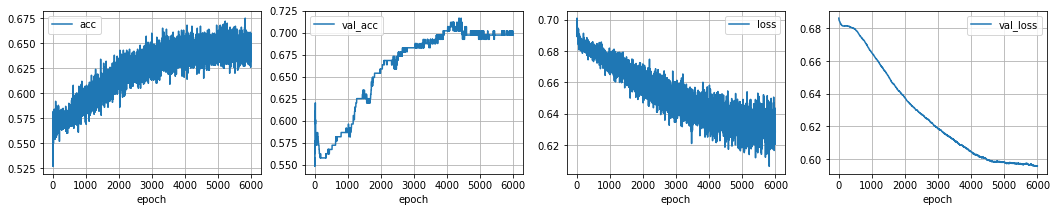

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,19,Adam,0.0001,0.000001,4,64,8,0,2018-03-01-10-57-58\


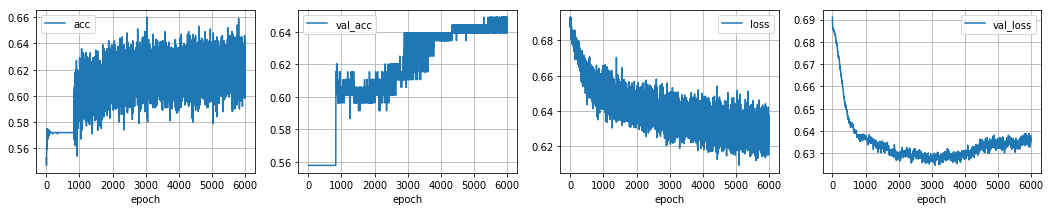

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,20,Adam,0.00001,0.000001,4,64,8,0,2018-03-01-11-23-35\


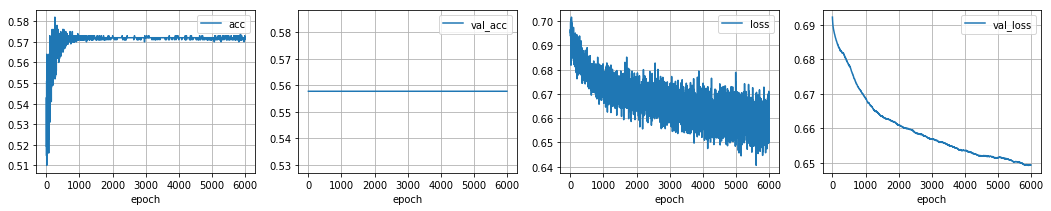

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,21,RMSprop,0.0001,0,4,64,8,0,2018-03-01-11-49-32\


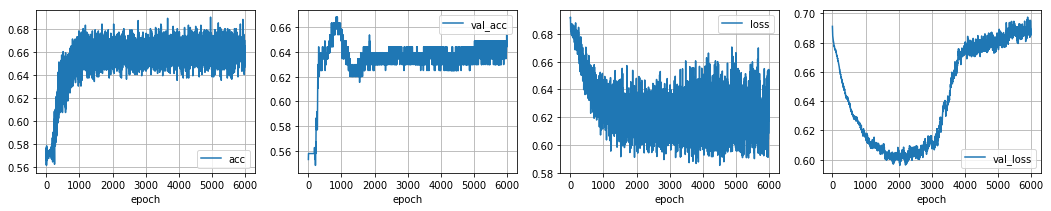

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,22,RMSprop,0.0001,0.00001,4,64,8,0,2018-03-01-12-13-17\


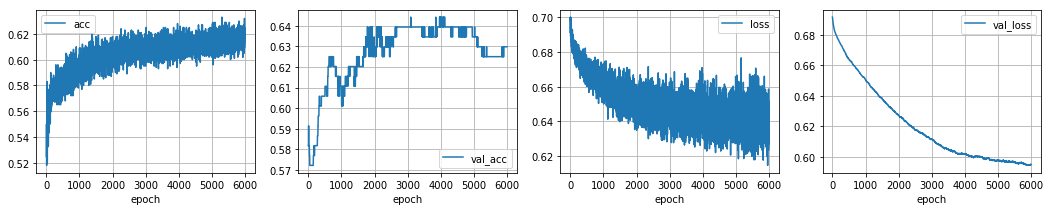

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,23,RMSprop,0.0001,0.000001,4,64,8,0,2018-03-01-12-37-56\


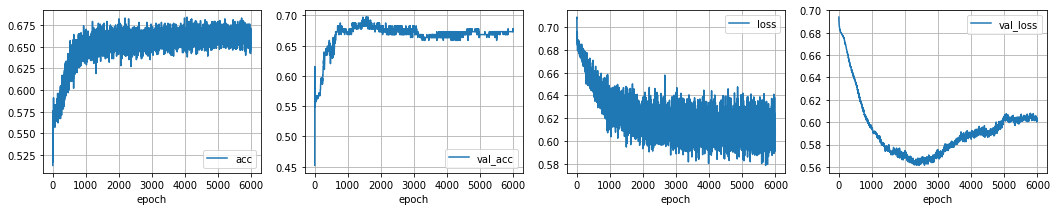

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,24,RMSprop,0.00001,0.000001,4,64,8,0,2018-03-01-13-02-53\


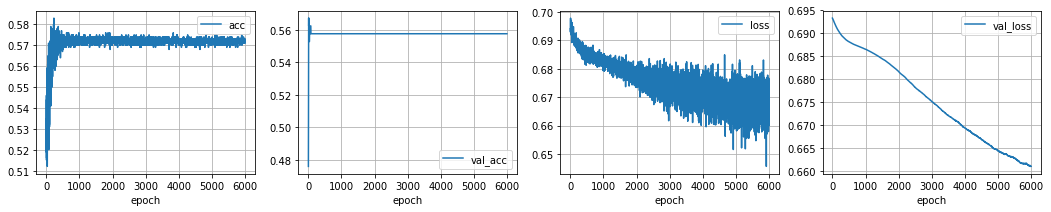

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,25,Adam,0.0001,0,4,64,8,6,2018-03-01-13-27-35\


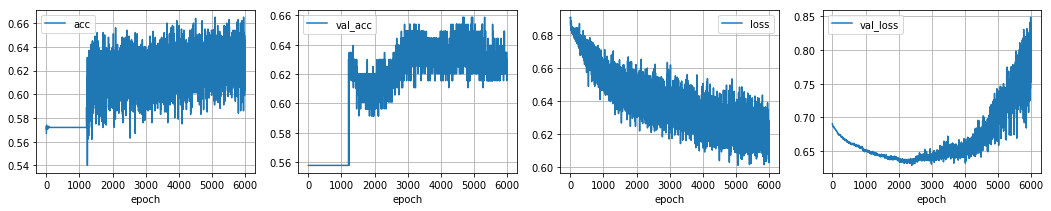

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,26,Adam,0.0001,0.00001,4,64,8,6,2018-03-01-13-56-07\


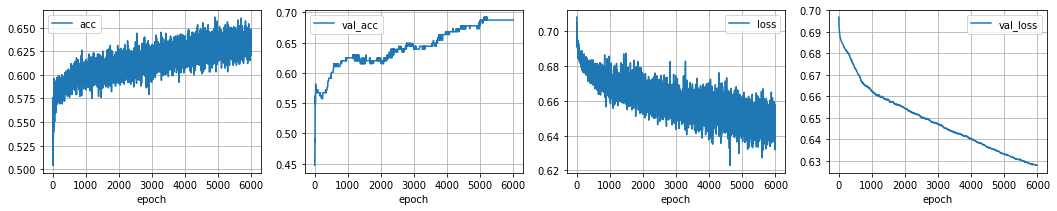

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,27,Adam,0.0001,0.000001,4,64,8,6,2018-03-01-14-25-35\


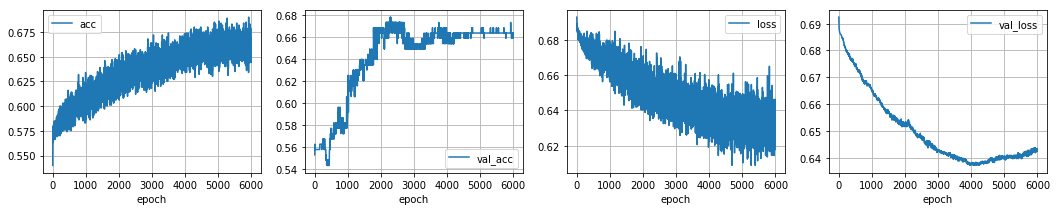

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,28,Adam,0.00001,0.000001,4,64,8,6,2018-03-01-14-54-29\


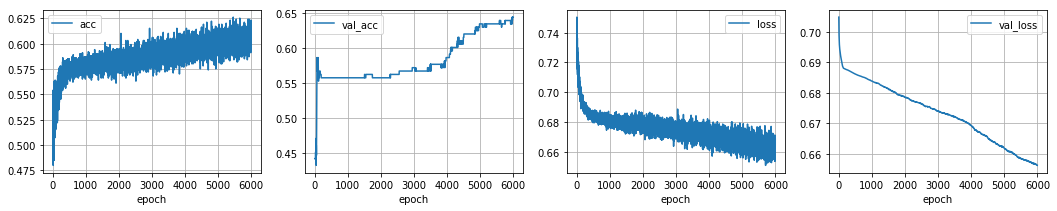

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,29,RMSprop,0.0001,0,4,64,8,6,2018-03-01-15-23-51\


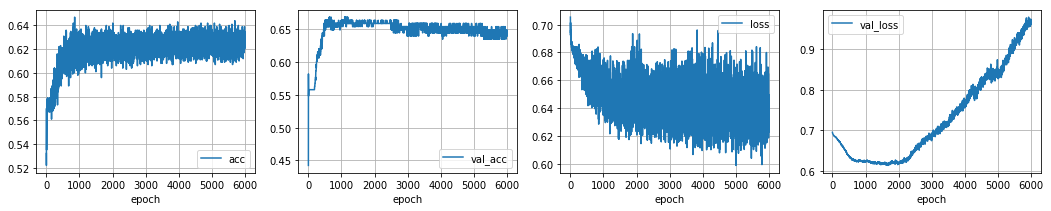

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,30,RMSprop,0.0001,0.00001,4,64,8,6,2018-03-01-15-51-46\


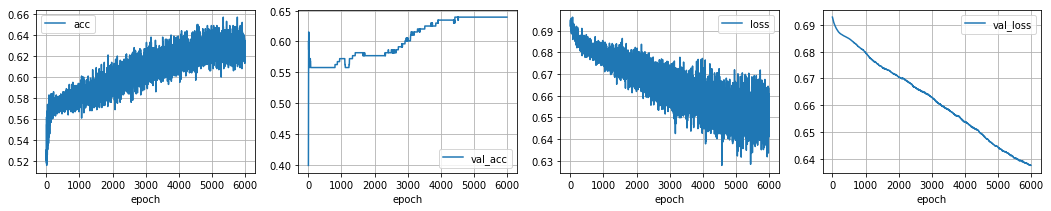

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,31,RMSprop,0.0001,0.000001,4,64,8,6,2018-03-01-16-20-02\


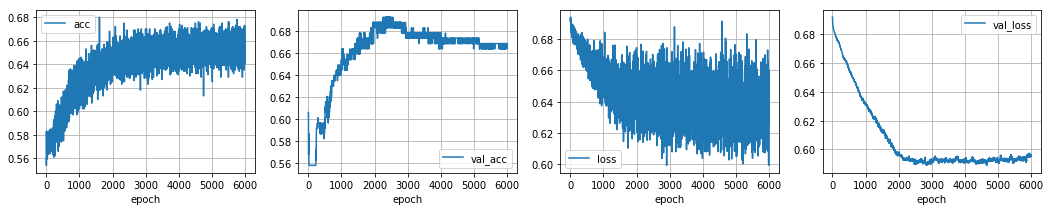

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,32,RMSprop,0.00001,0.000001,4,64,8,6,2018-03-01-16-47-29\


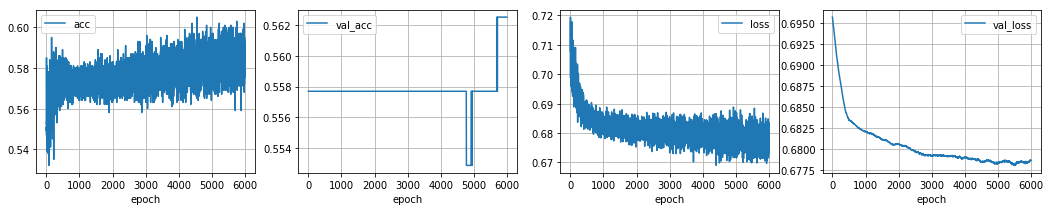

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,33,Adam,0.0001,0,4,64,32,0,2018-03-01-17-16-28\


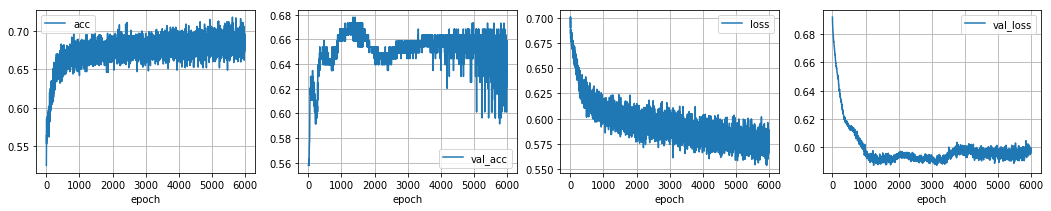

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,34,Adam,0.0001,0.00001,4,64,32,0,2018-03-01-17-44-51\


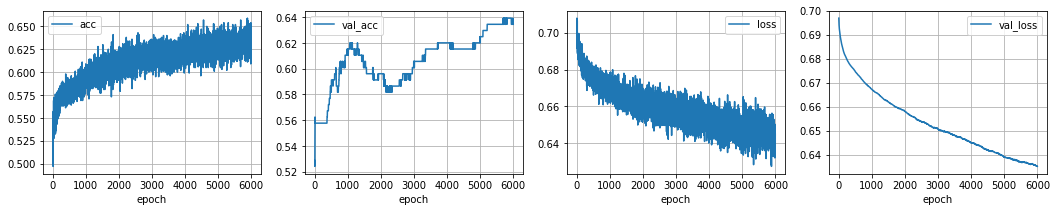

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,35,Adam,0.0001,0.000001,4,64,32,0,2018-03-01-18-15-31\


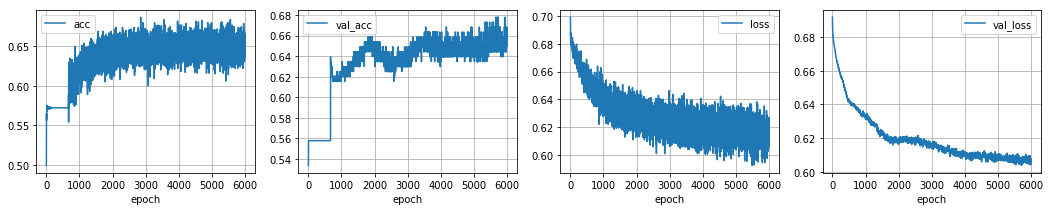

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,36,Adam,0.00001,0.000001,4,64,32,0,2018-03-01-18-43-54\


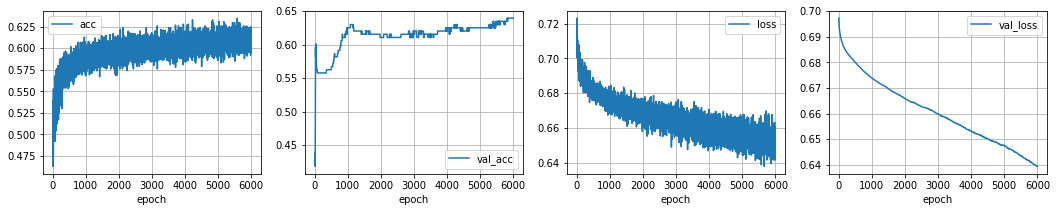

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,37,RMSprop,0.0001,0,4,64,32,0,2018-03-01-19-11-45\


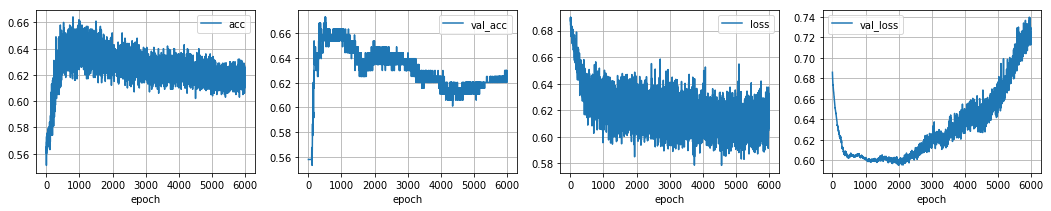

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,38,RMSprop,0.0001,0.00001,4,64,32,0,2018-03-01-19-38-37\


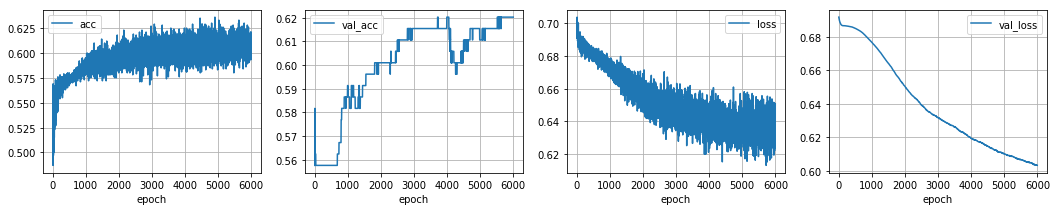

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,39,RMSprop,0.0001,0.000001,4,64,32,0,2018-03-01-20-06-49\


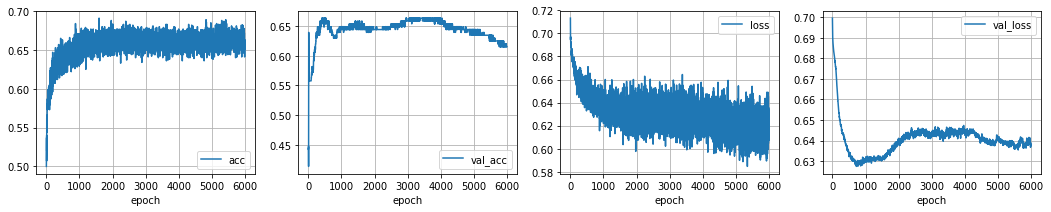

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,40,RMSprop,0.00001,0.000001,4,64,32,0,2018-03-01-20-33-56\


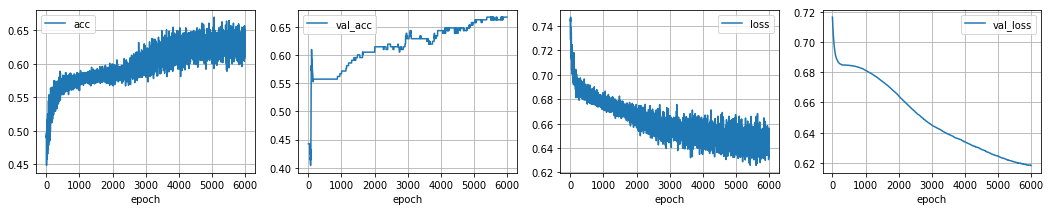

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,41,Adam,0.0001,0,6,6,32,0,2018-03-01-21-04-26\


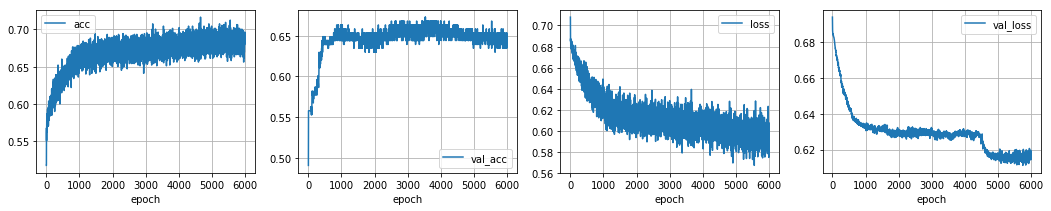

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,42,Adam,0.0001,0.00001,6,6,32,0,2018-03-01-21-37-27\


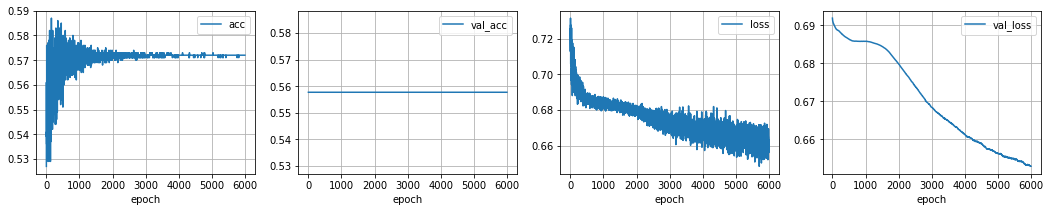

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,43,Adam,0.0001,0.000001,6,6,32,0,2018-03-01-22-12-44\


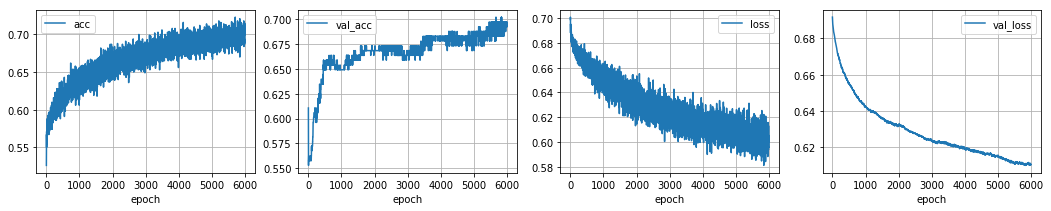

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,44,Adam,0.00001,0.000001,6,6,32,0,2018-03-01-22-50-08\


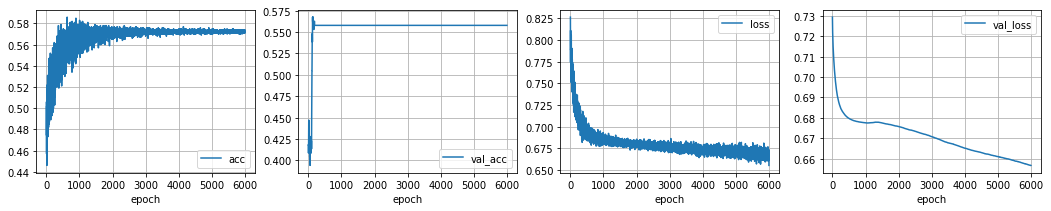

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,45,RMSprop,0.0001,0,6,6,32,0,2018-03-01-23-20-41\


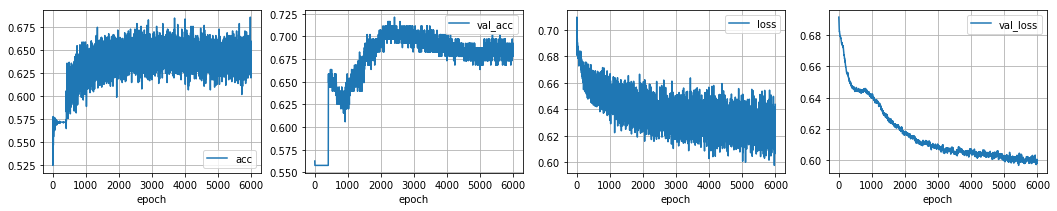

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,46,RMSprop,0.0001,0.00001,6,6,32,0,2018-03-01-23-48-49\


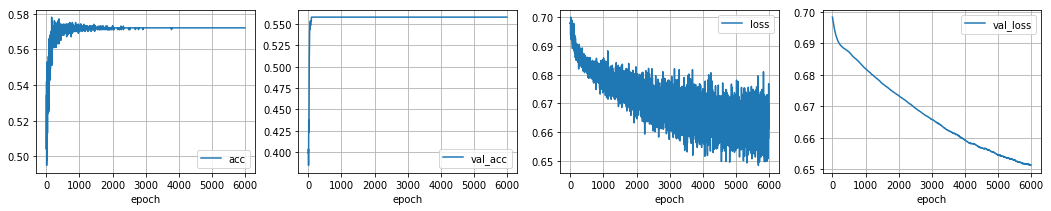

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,47,RMSprop,0.0001,0.000001,6,6,32,0,2018-03-02-00-16-32\


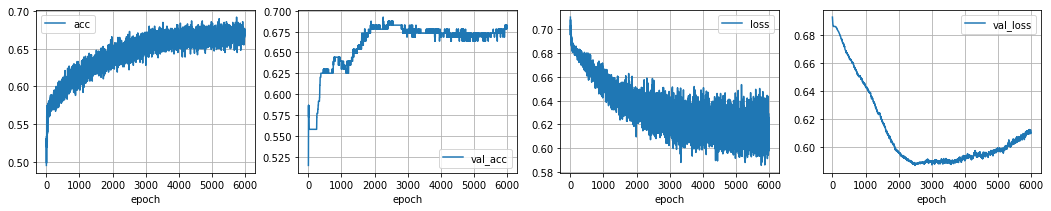

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,48,RMSprop,0.00001,0.000001,6,6,32,0,2018-03-02-00-44-32\


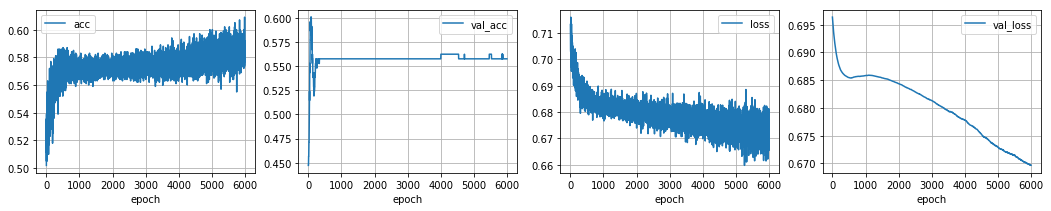

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,49,Adam,0.0001,0,6,6,32,64,2018-03-02-01-11-13\


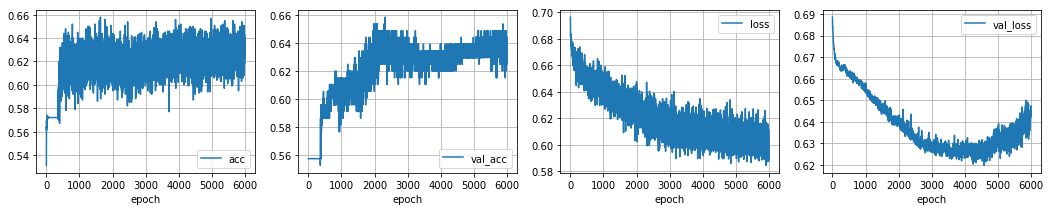

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,50,Adam,0.0001,0.00001,6,6,32,64,2018-03-02-01-44-33\


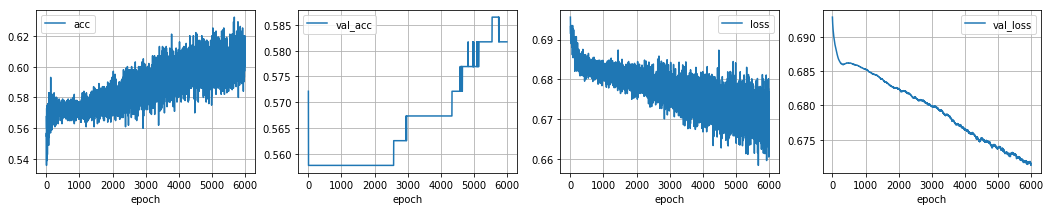

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,51,Adam,0.0001,0.000001,6,6,32,64,2018-03-02-02-14-33\


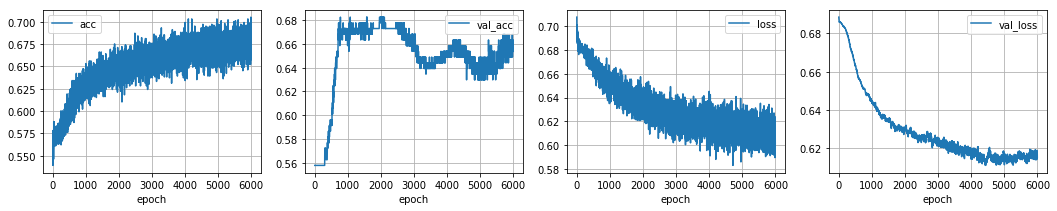

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,52,Adam,0.00001,0.000001,6,6,32,64,2018-03-02-02-45-23\


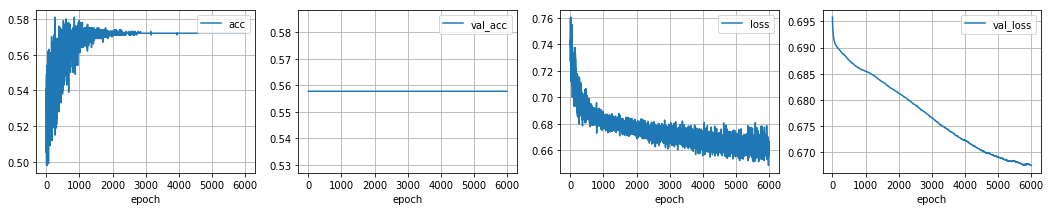

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,53,RMSprop,0.0001,0,6,6,32,64,2018-03-02-03-16-17\


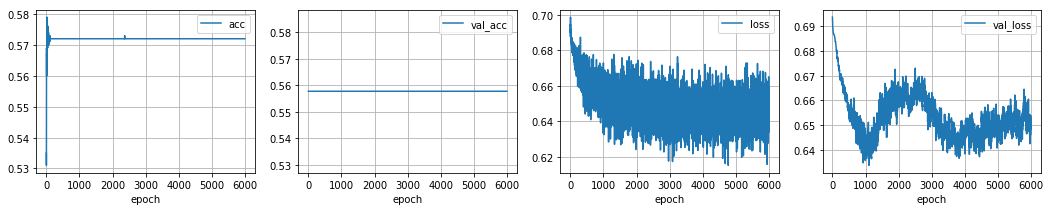

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,54,RMSprop,0.0001,0.00001,6,6,32,64,2018-03-02-03-47-11\


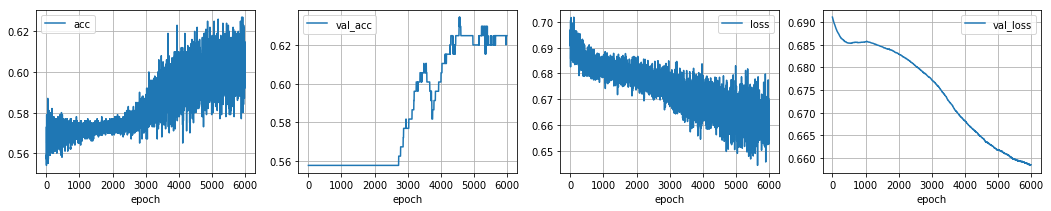

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,55,RMSprop,0.0001,0.000001,6,6,32,64,2018-03-02-04-18-49\


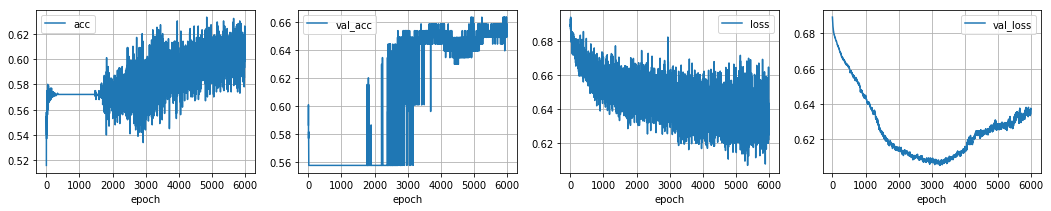

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,56,RMSprop,0.00001,0.000001,6,6,32,64,2018-03-02-04-49-39\


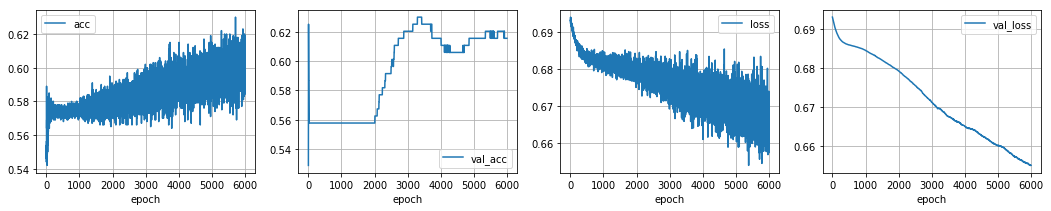

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,57,Adam,0.0001,0,6,6,32,16,2018-03-02-05-19-40\


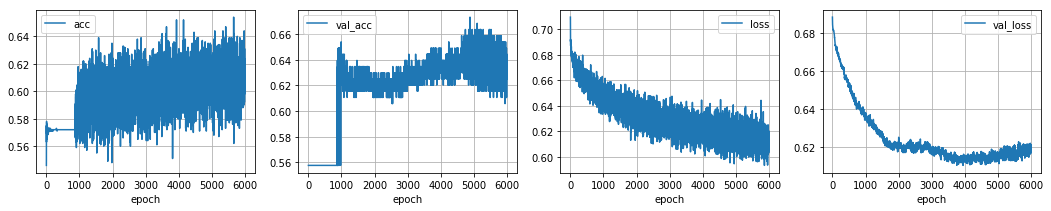

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,58,Adam,0.0001,0.00001,6,6,32,16,2018-03-02-05-48-39\


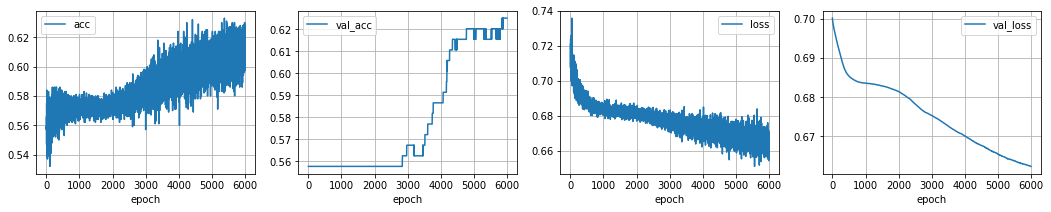

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,59,Adam,0.0001,0.000001,6,6,32,16,2018-03-02-06-25-13\


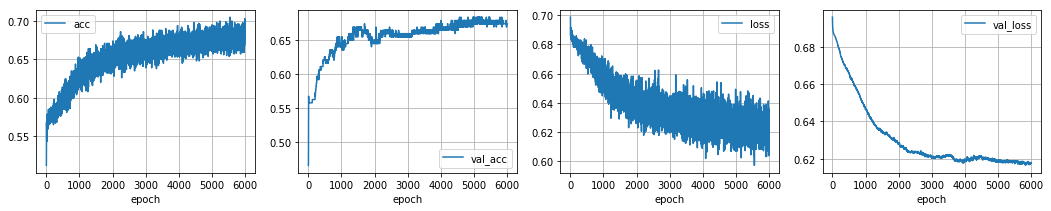

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,60,Adam,0.00001,0.000001,6,6,32,16,2018-03-02-06-57-56\


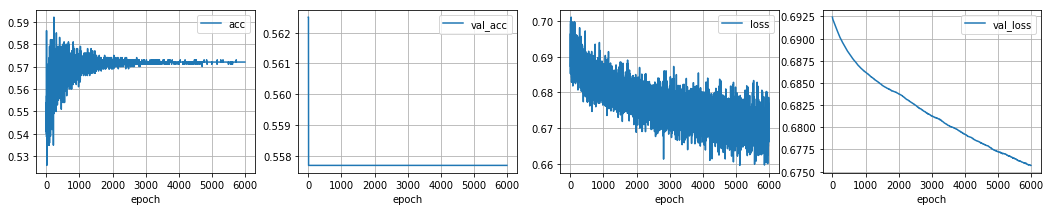

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,61,RMSprop,0.0001,0,6,6,32,16,2018-03-02-07-27-48\


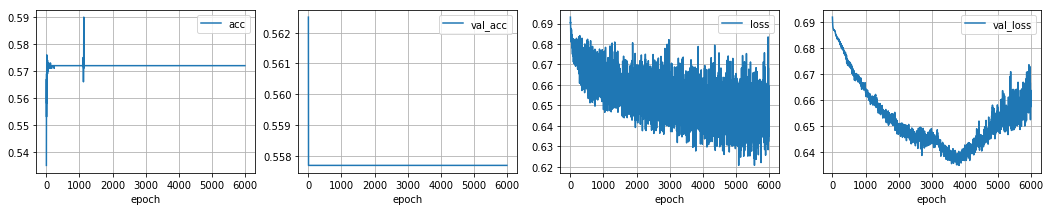

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,62,RMSprop,0.0001,0.00001,6,6,32,16,2018-03-02-07-55-42\


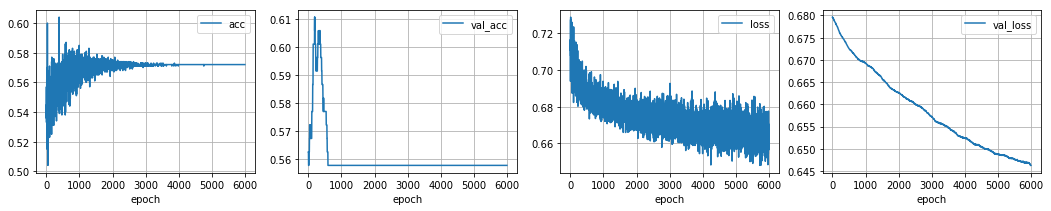

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,63,RMSprop,0.0001,0.000001,6,6,32,16,2018-03-02-08-23-49\


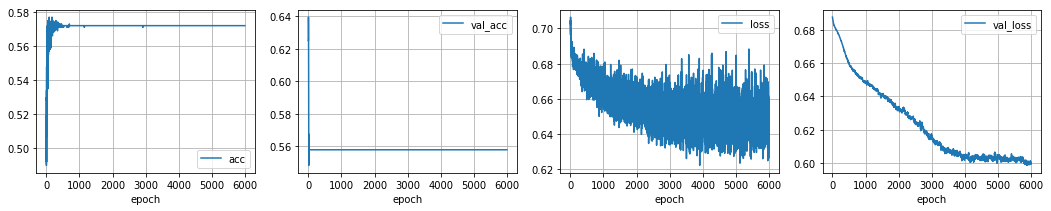

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,64,RMSprop,0.00001,0.000001,6,6,32,16,2018-03-02-08-51-57\


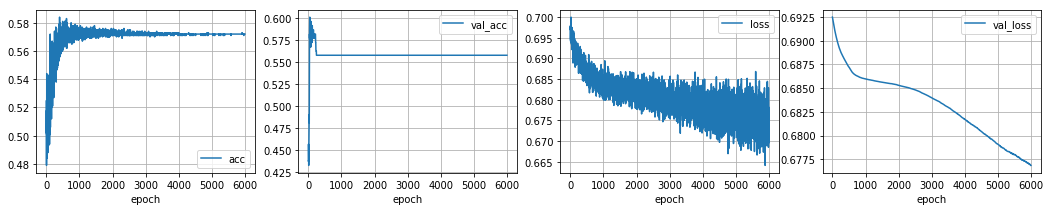

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,65,Adam,0.0001,0,6,6,32,8,2018-03-02-09-20-34\


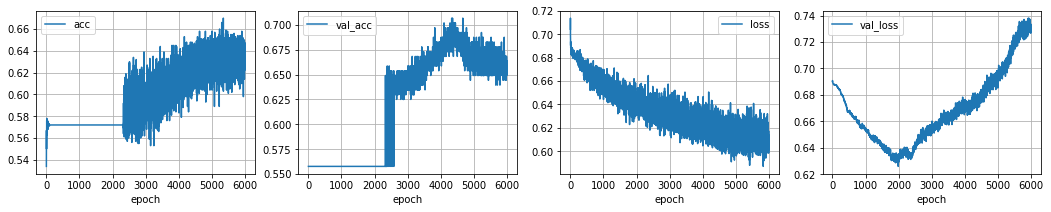

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,66,Adam,0.0001,0.00001,6,6,32,8,2018-03-02-09-50-19\


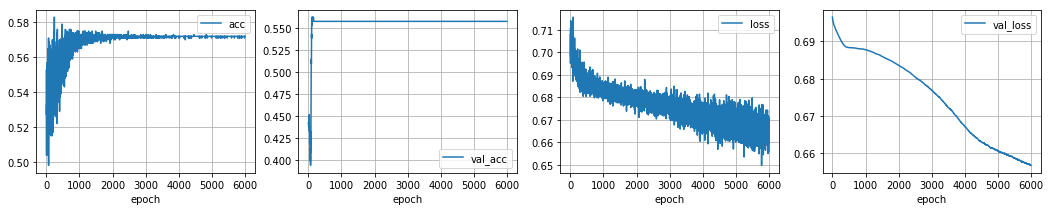

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,67,Adam,0.0001,0.000001,6,6,32,8,2018-03-02-10-20-50\


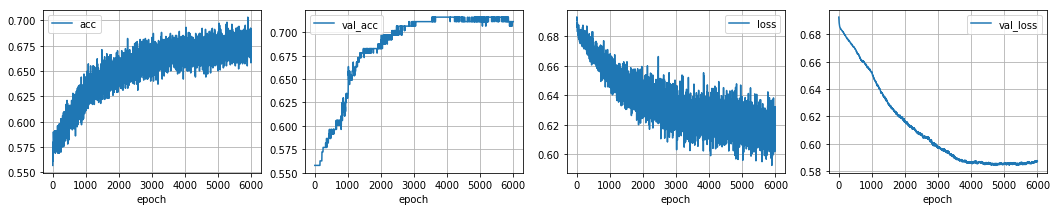

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,68,Adam,0.00001,0.000001,6,6,32,8,2018-03-02-10-51-14\


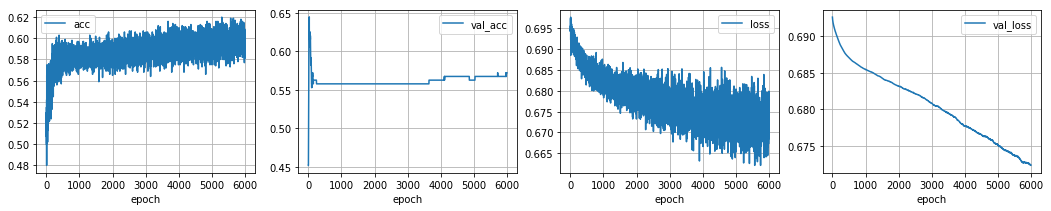

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,69,RMSprop,0.0001,0,6,6,32,8,2018-03-02-11-22-14\


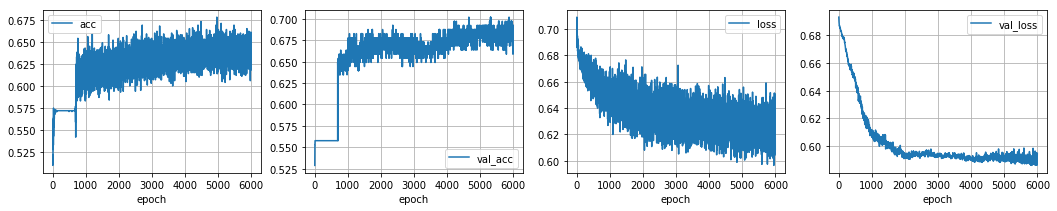

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,70,RMSprop,0.0001,0.00001,6,6,32,8,2018-03-02-11-51-03\


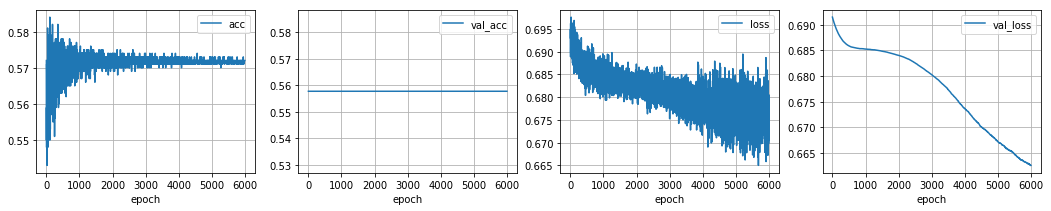

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,71,RMSprop,0.0001,0.000001,6,6,32,8,2018-03-02-12-20-26\


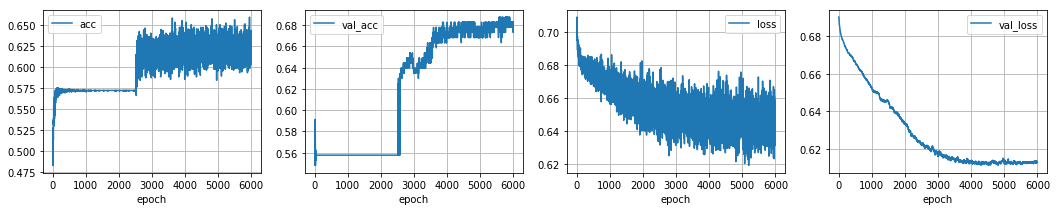

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,72,RMSprop,0.00001,0.000001,6,6,32,8,2018-03-02-12-49-46\


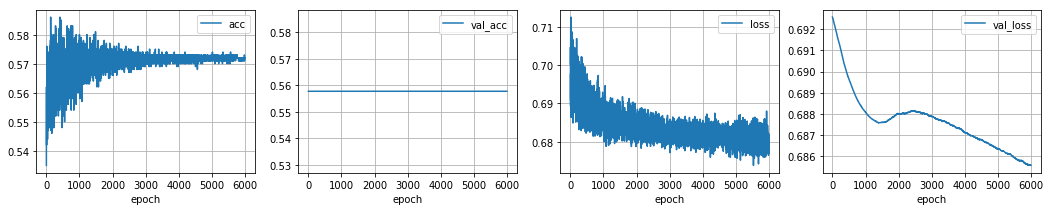

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,73,Adam,0.0001,0,6,6,64,0,2018-03-02-13-18-59\


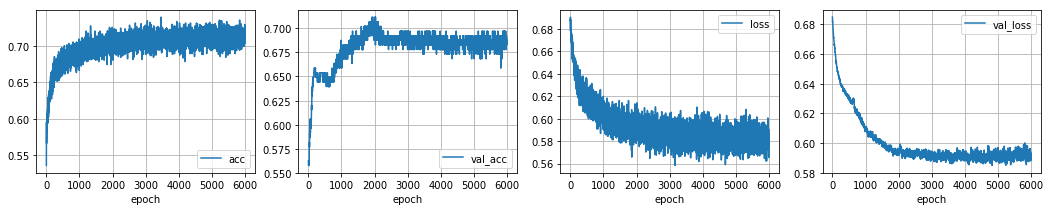

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,74,Adam,0.0001,0.00001,6,6,64,0,2018-03-02-13-47-23\


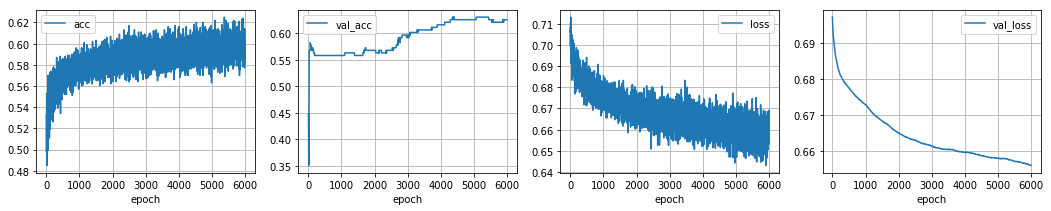

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,75,Adam,0.0001,0.000001,6,6,64,0,2018-03-02-14-16-02\


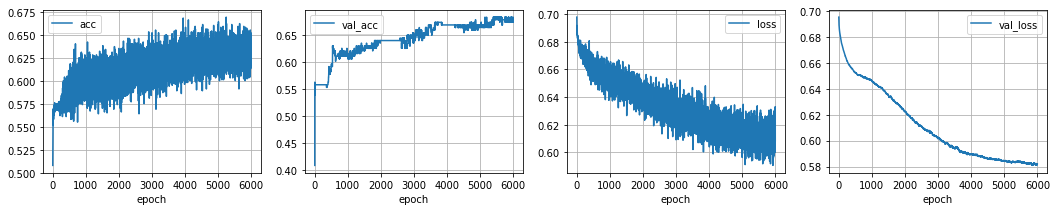

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,76,Adam,0.00001,0.000001,6,6,64,0,2018-03-02-14-45-10\


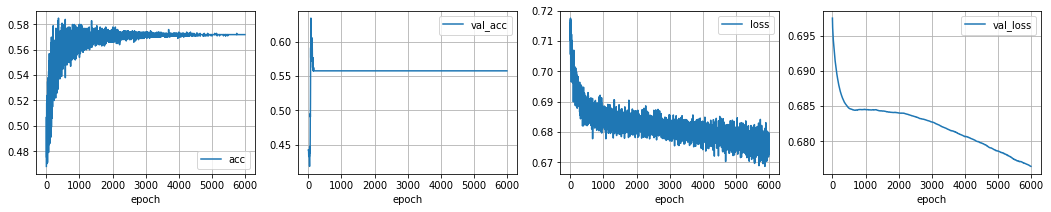

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,77,RMSprop,0.0001,0,6,6,64,0,2018-03-02-15-14-02\


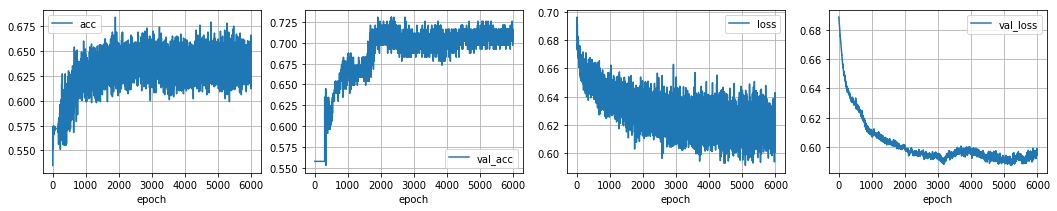

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,78,RMSprop,0.0001,0.00001,6,6,64,0,2018-03-02-15-40-48\


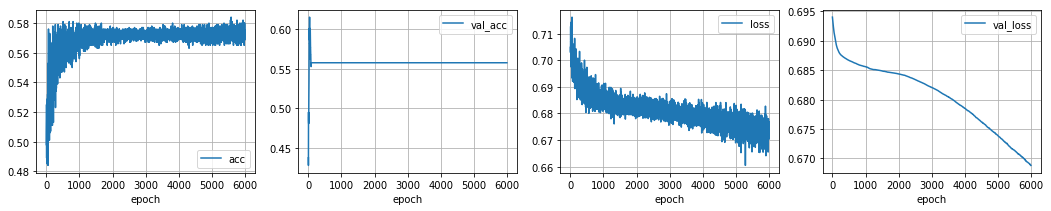

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,79,RMSprop,0.0001,0.000001,6,6,64,0,2018-03-02-16-08-04\


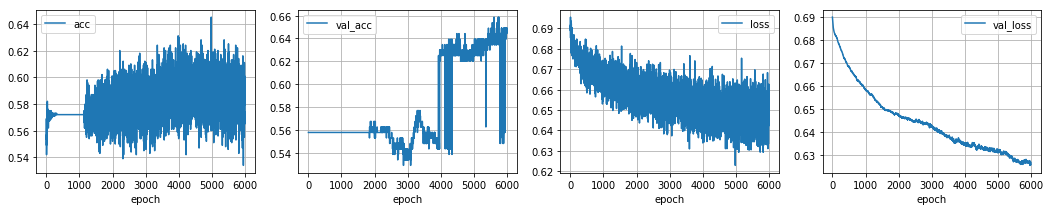

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,80,RMSprop,0.00001,0.000001,6,6,64,0,2018-03-02-16-35-23\


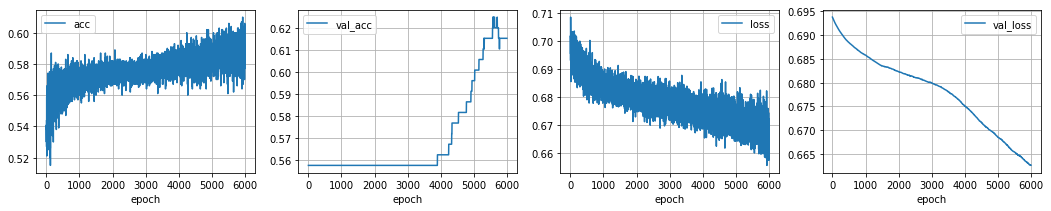

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,validation_split,name
0,81,RMSprop,0.0001,0.000001,4,32,16,0,2018-03-02-17-02-45\


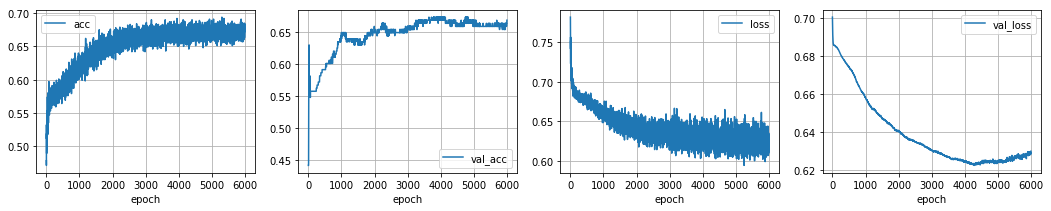

In [21]:
i = 1
for param in params:
    
    # Display a horizontal line.
    display(Markdown('***'))
    
    # Prepare a dataframe and render it in a nicely formatted table.
    param_array = {
        'serial': [str(i)],
        'optimizer': [param[0]],
        'learning_rate': [param[1]],
        'decay': [param[2]],
        'layer_1': [param[3]],
        'layer_2': [param[4]],
        'layer_3': [param[5]],
        'validation_split': [param[6]],
        'name': [param[7]]
    }
    df = pd.DataFrame(param_array, columns=[
        'serial',
        'optimizer', 
        'learning_rate', 
        'decay',
        'layer_1', 
        'layer_2', 
        'layer_3', 
        'validation_split', 
        'name'])
    display(df.head())

    # Plot all the epochs.
    plt.figure(1, figsize=(18,3))
    plt.subplot(1,4,1)
    param[8].plot(x='epoch', y='acc', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,2)
    param[8].plot(x='epoch', y='val_acc', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,3)
    param[8].plot(x='epoch', y='loss', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,4)
    param[8].plot(x='epoch', y='val_loss', ax=plt.gca())
    plt.grid(True)
    plt.show()
    i = i+1